In [1]:
# library loading 
!pip install pandas
import pandas as pd


In [13]:
""" name and code
customer_demographic - cd 
transaction_history - th
customer_service - csv
online_activty - oa
churn_status - cs 
"""

# uploading sheets
cd = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name = 0)
th = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name = 1)
csv = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name = 2)
oa = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name = 3)
cs = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name = 4)


In [11]:
#summary and description: customer demographic
print(cd.describe())
print(cd.head())
print("done")

        CustomerID          Age
count  1000.000000  1000.000000
mean    500.500000    43.267000
std     288.819436    15.242311
min       1.000000    18.000000
25%     250.750000    30.000000
50%     500.500000    43.000000
75%     750.250000    56.000000
max    1000.000000    69.000000
   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium
done


In [14]:
#summary and description: transaction history 
print(th.describe())
print(th.head())
print("done")

        CustomerID  TransactionID                TransactionDate  AmountSpent
count  5054.000000    5054.000000                           5054  5054.000000
mean    501.424218    5510.538979  2022-07-01 19:25:37.158686208   250.707351
min       1.000000    1000.000000            2022-01-01 00:00:00     5.180000
25%     251.000000    3242.000000            2022-04-03 00:00:00   127.105000
50%     506.000000    5530.000000            2022-07-01 00:00:00   250.525000
75%     749.000000    7680.750000            2022-09-29 00:00:00   373.412500
max    1000.000000    9997.000000            2022-12-31 00:00:00   499.860000
std     285.172780    2582.088012                            NaN   142.250838
   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3 

In [15]:
#summary and description: customer service
print(csv.describe())
print(csv.head())
print("done")

        CustomerID  InteractionID                InteractionDate
count  1002.000000    1002.000000                           1002
mean    485.209581    5952.887226  2022-07-02 19:28:22.994011904
min       1.000000    2015.000000            2022-01-01 00:00:00
25%     238.250000    3991.500000            2022-04-07 00:00:00
50%     474.500000    5911.500000            2022-07-02 12:00:00
75%     735.750000    7908.250000            2022-09-30 00:00:00
max     995.000000    9997.000000            2022-12-30 00:00:00
std     287.030259    2305.819681                            NaN
   CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17         Inquiry         Resolved
2           3           9976      2022-08-24         Inquiry         Resolved
3           4           7354      2022-11-18         Inquiry         Resolved
4           4           5

In [16]:
#summary and description: online activity 
print(oa.describe())
print(oa.head())
print("done")

        CustomerID        LastLoginDate  LoginFrequency
count  1000.000000                 1000     1000.000000
mean    500.500000  2023-07-05 21:28:48       25.912000
min       1.000000  2023-01-01 00:00:00        1.000000
25%     250.750000  2023-04-08 00:00:00       13.750000
50%     500.500000  2023-07-10 12:00:00       27.000000
75%     750.250000  2023-10-01 06:00:00       38.000000
max    1000.000000  2023-12-31 00:00:00       49.000000
std     288.819436                  NaN       14.055953
   CustomerID LastLoginDate  LoginFrequency ServiceUsage
0           1    2023-10-21              34   Mobile App
1           2    2023-12-05               5      Website
2           3    2023-11-15               3      Website
3           4    2023-08-25               2      Website
4           5    2023-10-27              41      Website
done


In [17]:
#summary and description: churn status
print(cs.describe())
print(cs.head())
print("done")

        CustomerID  ChurnStatus
count  1000.000000  1000.000000
mean    500.500000     0.204000
std     288.819436     0.403171
min       1.000000     0.000000
25%     250.750000     0.000000
50%     500.500000     0.000000
75%     750.250000     0.000000
max    1000.000000     1.000000
   CustomerID  ChurnStatus
0           1            0
1           2            1
2           3            0
3           4            0
4           5            0
done


In [18]:
# python packages for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.style.use('ggplot')
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

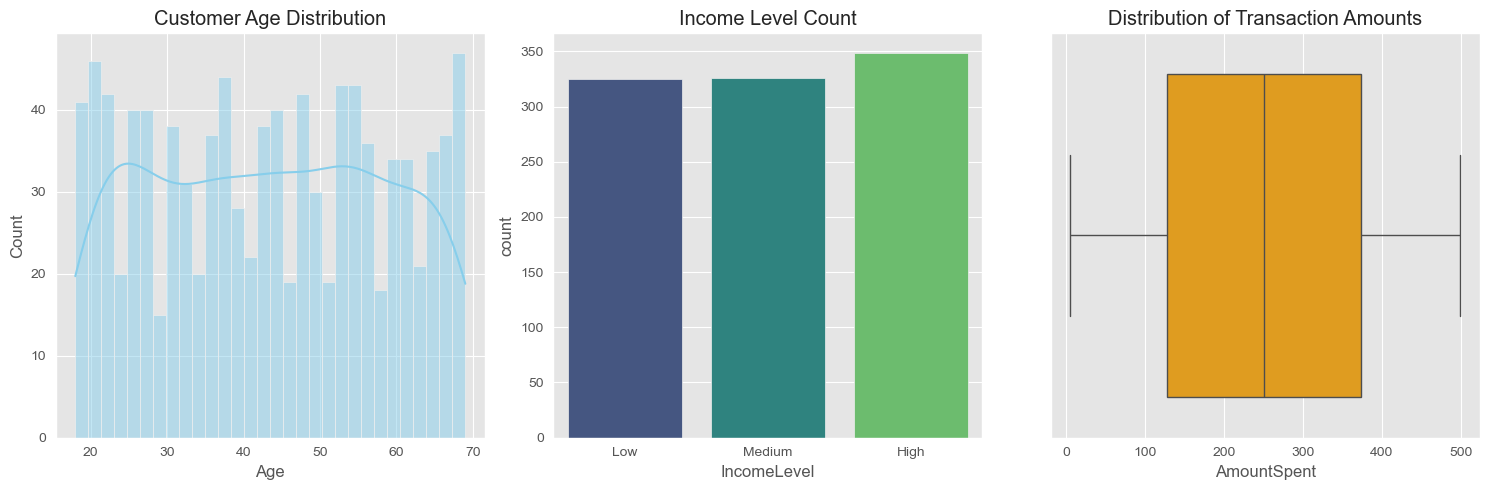

In [19]:
#visualising raw data - intial EDA

# Set up a figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Age Distribution (Are there many young professionals?)
plt.subplot(1, 3, 1)
sns.histplot(cd['Age'], bins=30, kde=True, color='skyblue')
plt.title('Customer Age Distribution')

# 2. Income Levels
plt.subplot(1, 3, 2)
sns.countplot(x='IncomeLevel', data=cd, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Income Level Count')

# 3. Transaction Amounts (Checking for outliers)
plt.subplot(1, 3, 3)
sns.boxplot(x=th['AmountSpent'], color='orange')
plt.title('Distribution of Transaction Amounts')

plt.tight_layout()
plt.show()

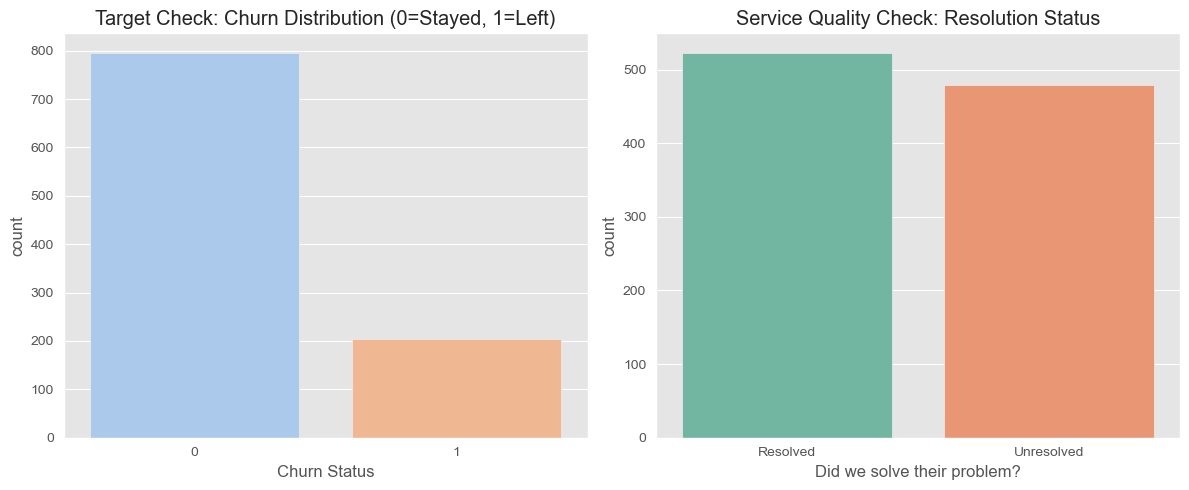

In [20]:
#churn and service visualisation

# Create a new figure for the missing categorical checks
plt.figure(figsize=(12, 5))

# 1. Check the Target: Churn Status
plt.subplot(1, 2, 1)
# We use the raw churn_df here
sns.countplot(x='ChurnStatus', data=cs, palette='pastel')
plt.title('Target Check: Churn Distribution (0=Stayed, 1=Left)')
plt.xlabel('Churn Status')

# 2. Check the Pain Point: Service Resolution
plt.subplot(1, 2, 2)
# We use the raw service_df here
sns.countplot(x='ResolutionStatus', data=csv, palette='Set2')
plt.title('Service Quality Check: Resolution Status')
plt.xlabel('Did we solve their problem?')

plt.tight_layout()
plt.show()

In [21]:
# Feature Engineering - Aggregating Transaction Data 

# Group by CustomerID to get a single summary row per customer
trans_agg = th.groupby('CustomerID').agg(
    Total_Spend=('AmountSpent', 'sum'),              # Total money spent
    Avg_Transaction_Amt=('AmountSpent', 'mean'),     # Average purchase size
    Transaction_Count=('TransactionID', 'count'),    # How active are they?
    Latest_Transaction=('TransactionDate', 'max')    # When did they last buy?
).reset_index()

print("Transactions Aggregated:")
display(trans_agg.head())

Transactions Aggregated:


,CustomerID,Total_Spend,Avg_Transaction_Amt,Transaction_Count,Latest_Transaction
0,1,416.50,416.50000,1,2022-03-27
1,2,1547.42,221.06000,7,2022-11-19
2,3,1702.98,283.83000,6,2022-10-08
3,4,917.29,183.45800,5,2022-12-27
4,5,2001.49,250.18625,8,2022-12-21


In [22]:
# Feature Engineering - Customer Service Interaction Aggregation

# Group by CustomerID to summarize service history
service_agg = csv.groupby('CustomerID').agg(
    Total_Calls=('InteractionID', 'count'),
    # Calculate how many calls ended as 'Unresolved'
    Unresolved_Calls=('ResolutionStatus', lambda x: (x == 'Unresolved').sum())
).reset_index()

print("Service Interactions Aggregated:")
display(service_agg.head())

Service Interactions Aggregated:


,CustomerID,Total_Calls,Unresolved_Calls
0,1,1,0
1,2,1,0
2,3,1,0
3,4,2,1
4,6,1,0


In [24]:
# Master Data Table - merging all aggregated tables on the customer id attribute

# 1. Base Table: Demographics
df = cd.copy()

# 2. Join Churn Status
df = pd.merge(df, cs, on='CustomerID', how='left')

# 3. Join Online Activity
df = pd.merge(df, oa, on='CustomerID', how='left')

# 4. Join Aggregated Transactions
df = pd.merge(df, th, on='CustomerID', how='left')

# 5. Join Aggregated Service Data
df = pd.merge(df, csv, on='CustomerID', how='left')

# Fill NaN values with 0
# (If a customer isn't in the transaction table, it means they spent 0, not that the data is missing)
df.fillna({
    'Total_Spend': 0,
    'Avg_Transaction_Amt': 0,
    'Transaction_Count': 0,
    'Total_Calls': 0,
    'Unresolved_Calls': 0
}, inplace=True)

print(f"Final Master Dataset Shape: {df.shape}")
print(display(df.head()))
print(df.describe())
print(df.shape)
print("done")

Final Master Dataset Shape: (6812, 17)


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LastLoginDate,LoginFrequency,ServiceUsage,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,62,M,Single,Low,0,2023-10-21,34,Mobile App,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved
1,2,65,M,Married,Low,1,2023-12-05,5,Website,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved
2,2,65,M,Married,Low,1,2023-12-05,5,Website,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved
3,2,65,M,Married,Low,1,2023-12-05,5,Website,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved
4,2,65,M,Married,Low,1,2023-12-05,5,Website,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved


None
        CustomerID          Age  ChurnStatus                  LastLoginDate  \
count  6812.000000  6812.000000  6812.000000                           6812   
mean    500.169260    43.274516     0.198473  2023-07-06 04:56:47.633587712   
min       1.000000    18.000000     0.000000            2023-01-01 00:00:00   
25%     247.000000    30.000000     0.000000            2023-04-12 00:00:00   
50%     505.500000    44.000000     0.000000            2023-07-13 00:00:00   
75%     750.000000    56.000000     0.000000            2023-10-01 00:00:00   
max    1000.000000    69.000000     1.000000            2023-12-31 00:00:00   
std     286.704642    15.286788     0.398880                            NaN   

       LoginFrequency  TransactionID                TransactionDate  \
count     6812.000000    6812.000000                           6812   
mean        25.724310    5497.323253  2022-07-01 02:11:29.136817408   
min          1.000000    1000.000000            2022-01-01 00:00:00   

In [29]:
#MERGE AND Feature Engineering - Converting date format to number for machine learning part. models don't read dates but numbers

# --- PART 1: RE-MERGE (Ensuring columns exist) ---
# 1. Base Table: Demographics
df = cd.copy()

# 2. Join Churn Status
df = pd.merge(df, cs, on='CustomerID', how='left')

# 3. Join Online Activity (Contains 'LastLoginDate')
df = pd.merge(df, oa, on='CustomerID', how='left')

# 4. Join Aggregated Transactions (Contains 'Latest_Transaction')
df = pd.merge(df, th, on='CustomerID', how='left')

# 5. Join Aggregated Service Data
df = pd.merge(df, csv, on='CustomerID', how='left')

# Fill NaN values for numerical columns only
df.fillna({
    'Total_Spend': 0,
    'Avg_Transaction_Amt': 0,
    'Transaction_Count': 0,
    'Total_Calls': 0,
    'Unresolved_Calls': 0
}, inplace=True)

# --- PART 2: DATE ENGINEERING (The fix) ---

# 1. Convert to datetime (using errors='coerce' to handle any messy data safely)
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'], errors='coerce')

# 2. Define Reference Date (Simulating "Today")
# We use the latest date in the entire dataset + 1 day
reference_date = df['LastLoginDate'].max() + pd.Timedelta(days=1)
print(f"Reference Date (Today): {reference_date}")

# 3. Calculate Days Since Last Event
df['Days_Since_Login'] = (reference_date - df['LastLoginDate']).dt.days
df['Days_Since_Transaction'] = (reference_date - df['TransactionDate']).dt.days
df['Days_Since_Interaction'] = (reference_date - df['InteractionDate']).dt.days

# 4. Handle NaNs for dates
# If Days_Since_Login is NaN, it means they never logged in. We set it to a high number (e.g., 365).
df['Days_Since_Login'].fillna(365, inplace=True)
df['Days_Since_Transaction'].fillna(365, inplace=True)
df['Days_Since_Interaction'].fillna(365, inplace=True)

# 5. Drop the original date columns (Cleanup)
df.drop(columns=['LastLoginDate', 'TransactionDate', 'InteractionDate'], inplace=True)

print("--- Date Engineering Successful ---")
print("New features 'Days_Since_Login' and 'Days_Since_Transaction, 'Days_Since_Interaction' created.")
display(df[['CustomerID', 'Days_Since_Login', 'Days_Since_Transaction', 'Days_Since_Interaction']].head())

Reference Date (Today): 2024-01-01 00:00:00
--- Date Engineering Successful ---
New features 'Days_Since_Login' and 'Days_Since_Transaction, 'Days_Since_Interaction' created.


,CustomerID,Days_Since_Login,Days_Since_Transaction,Days_Since_Interaction
0,1,72,645,641.0
1,2,27,511,655.0
2,2,27,525,655.0
3,2,27,706,655.0
4,2,27,526,655.0


Correlation with Churn Status:
ChurnStatus               1.000000
Days_Since_Interaction    0.093400
Age                       0.045048
Days_Since_Login          0.031073
InteractionID             0.023130
AmountSpent               0.005113
Days_Since_Transaction   -0.006527
TransactionID            -0.008736
CustomerID               -0.025158
LoginFrequency           -0.100391
Name: ChurnStatus, dtype: float64


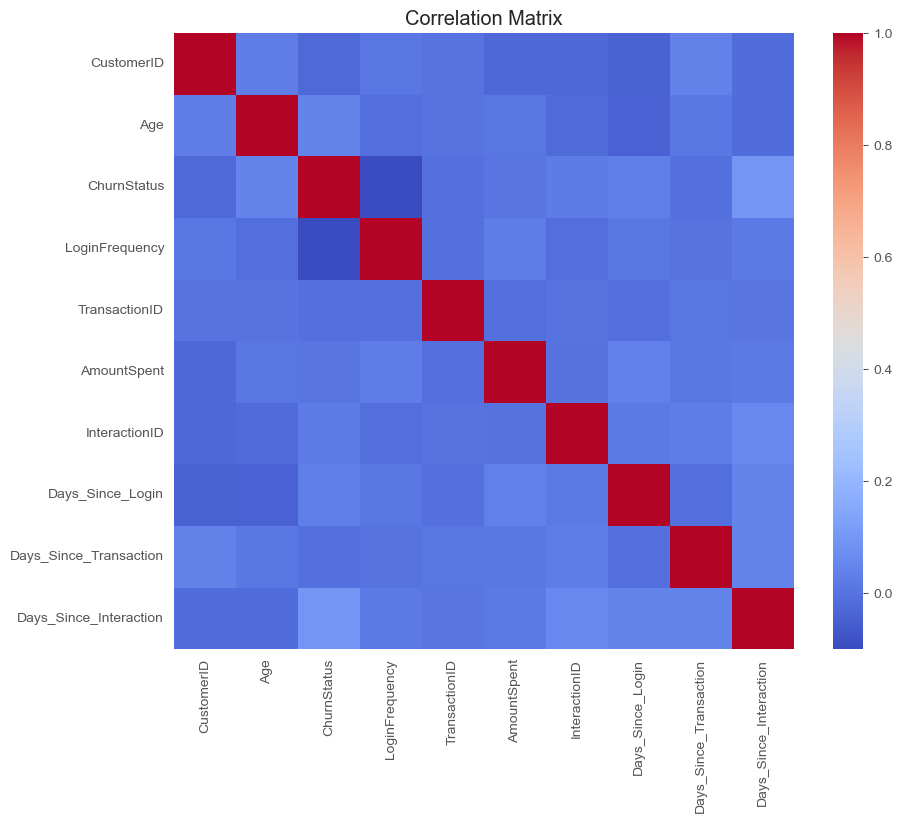

In [30]:
# Correlation with churn check

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with ChurnStatus
correlation = numeric_df.corr()['ChurnStatus'].sort_values(ascending=False)

print("Correlation with Churn Status:")
print(correlation)

# Visual Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [31]:
# Final Processing for machine learning and further parts in follow up steps

# 1. One-Hot Encode Categorical Variables
# This converts 'Gender' -> 'Gender_Male' (0 or 1)
df_model = pd.get_dummies(df, columns=['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage'], drop_first=True)

# 2. Drop ID column (not useful for prediction)
df_model.drop(columns=['CustomerID'], inplace=True)

print("Final Data Ready for Modelling:")
display(df_model.head())

# 3. Save to CSV
df_model.to_csv('cleaned_lloyds_data.csv', index=False)
print("File 'cleaned_lloyds_data.csv' saved successfully!")

Final Data Ready for Modelling:


,Age,ChurnStatus,LoginFrequency,TransactionID,AmountSpent,ProductCategory,InteractionID,InteractionType,ResolutionStatus,Days_Since_Login,Days_Since_Transaction,Days_Since_Interaction,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website
0,62,0,34,7194,416.50,Electronics,6363.0,Inquiry,Resolved,72,645,641.0,True,False,True,False,True,False,False,False
1,65,1,5,7250,54.96,Clothing,3329.0,Inquiry,Resolved,27,511,655.0,True,True,False,False,True,False,False,True
2,65,1,5,9660,197.50,Electronics,3329.0,Inquiry,Resolved,27,525,655.0,True,True,False,False,True,False,False,True
3,65,1,5,2998,101.31,Furniture,3329.0,Inquiry,Resolved,27,706,655.0,True,True,False,False,True,False,False,True
4,65,1,5,1228,397.37,Clothing,3329.0,Inquiry,Resolved,27,526,655.0,True,True,False,False,True,False,False,True


File 'cleaned_lloyds_data.csv' saved successfully!


Loaded DataFrame with 20 columns.
Numerical columns used: ['Age', 'LoginFrequency', 'AmountSpent', 'Days_Since_Login', 'Days_Since_Transaction', 'Days_Since_Interaction']
Binary columns used: ['Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'ServiceUsage_Website']


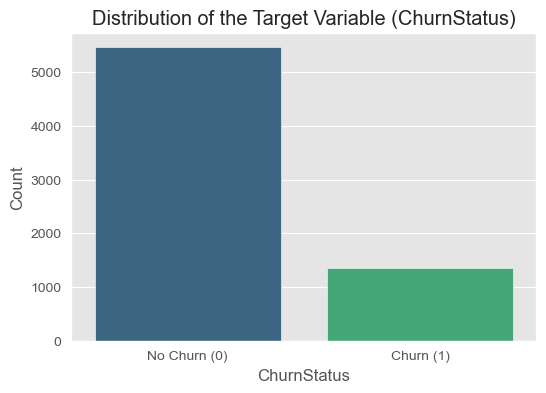

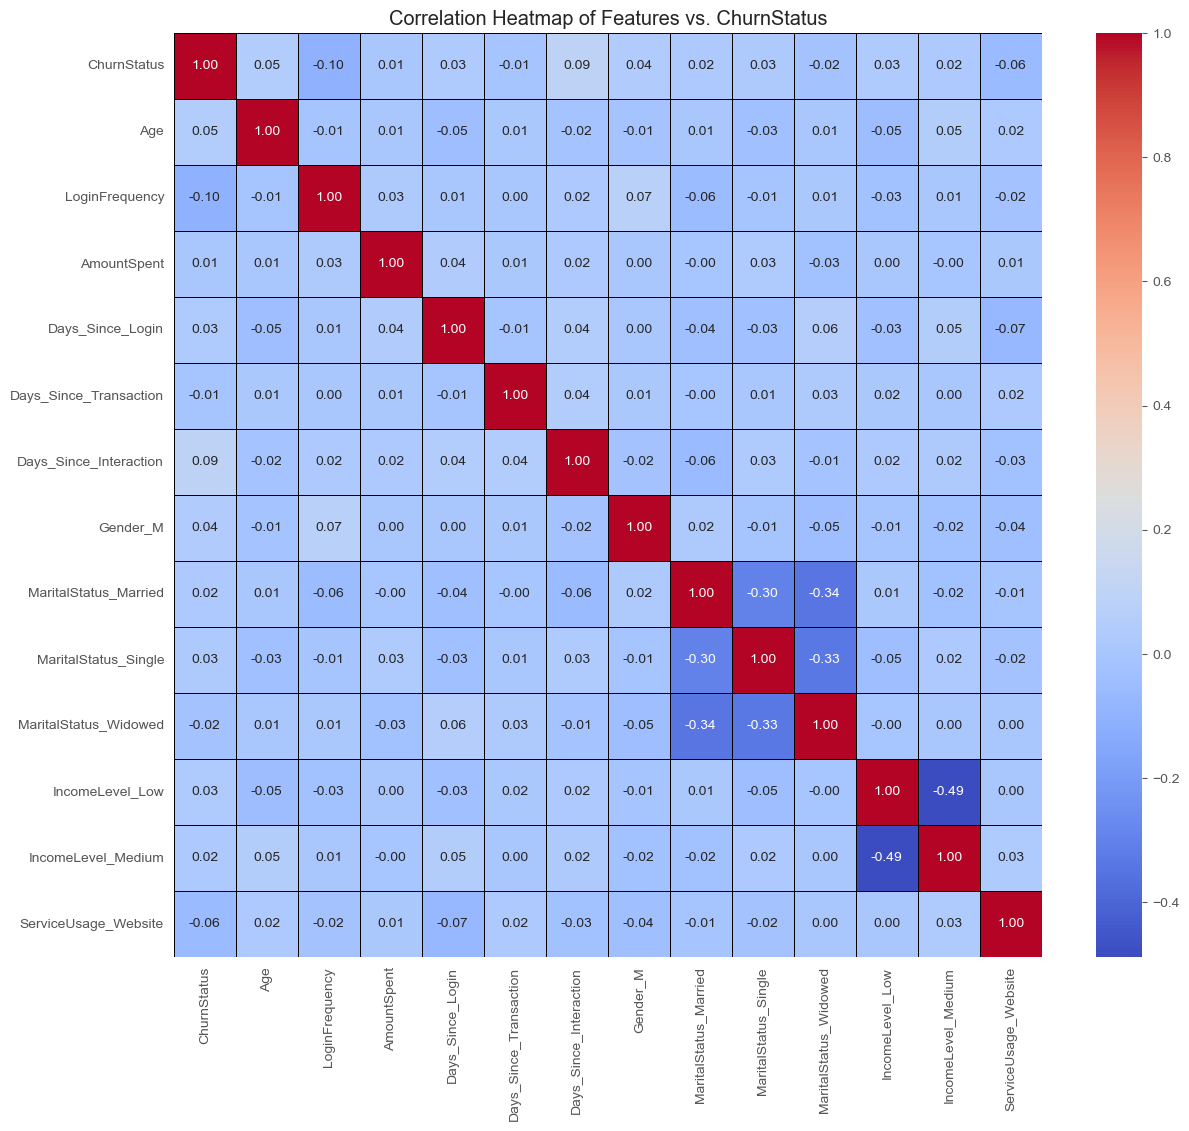

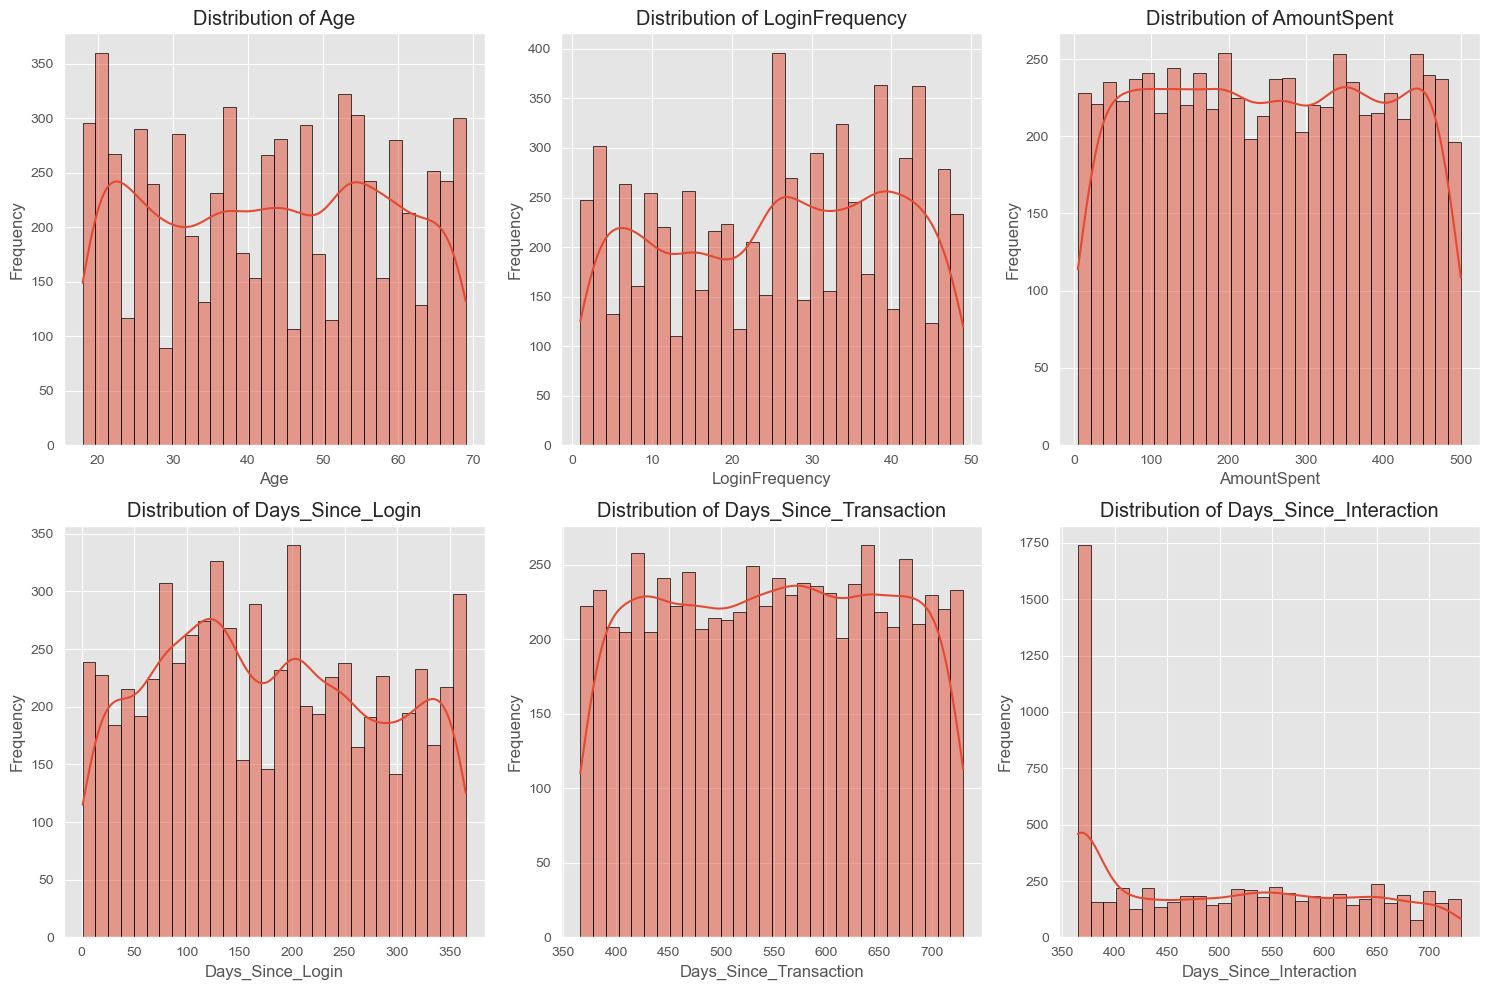

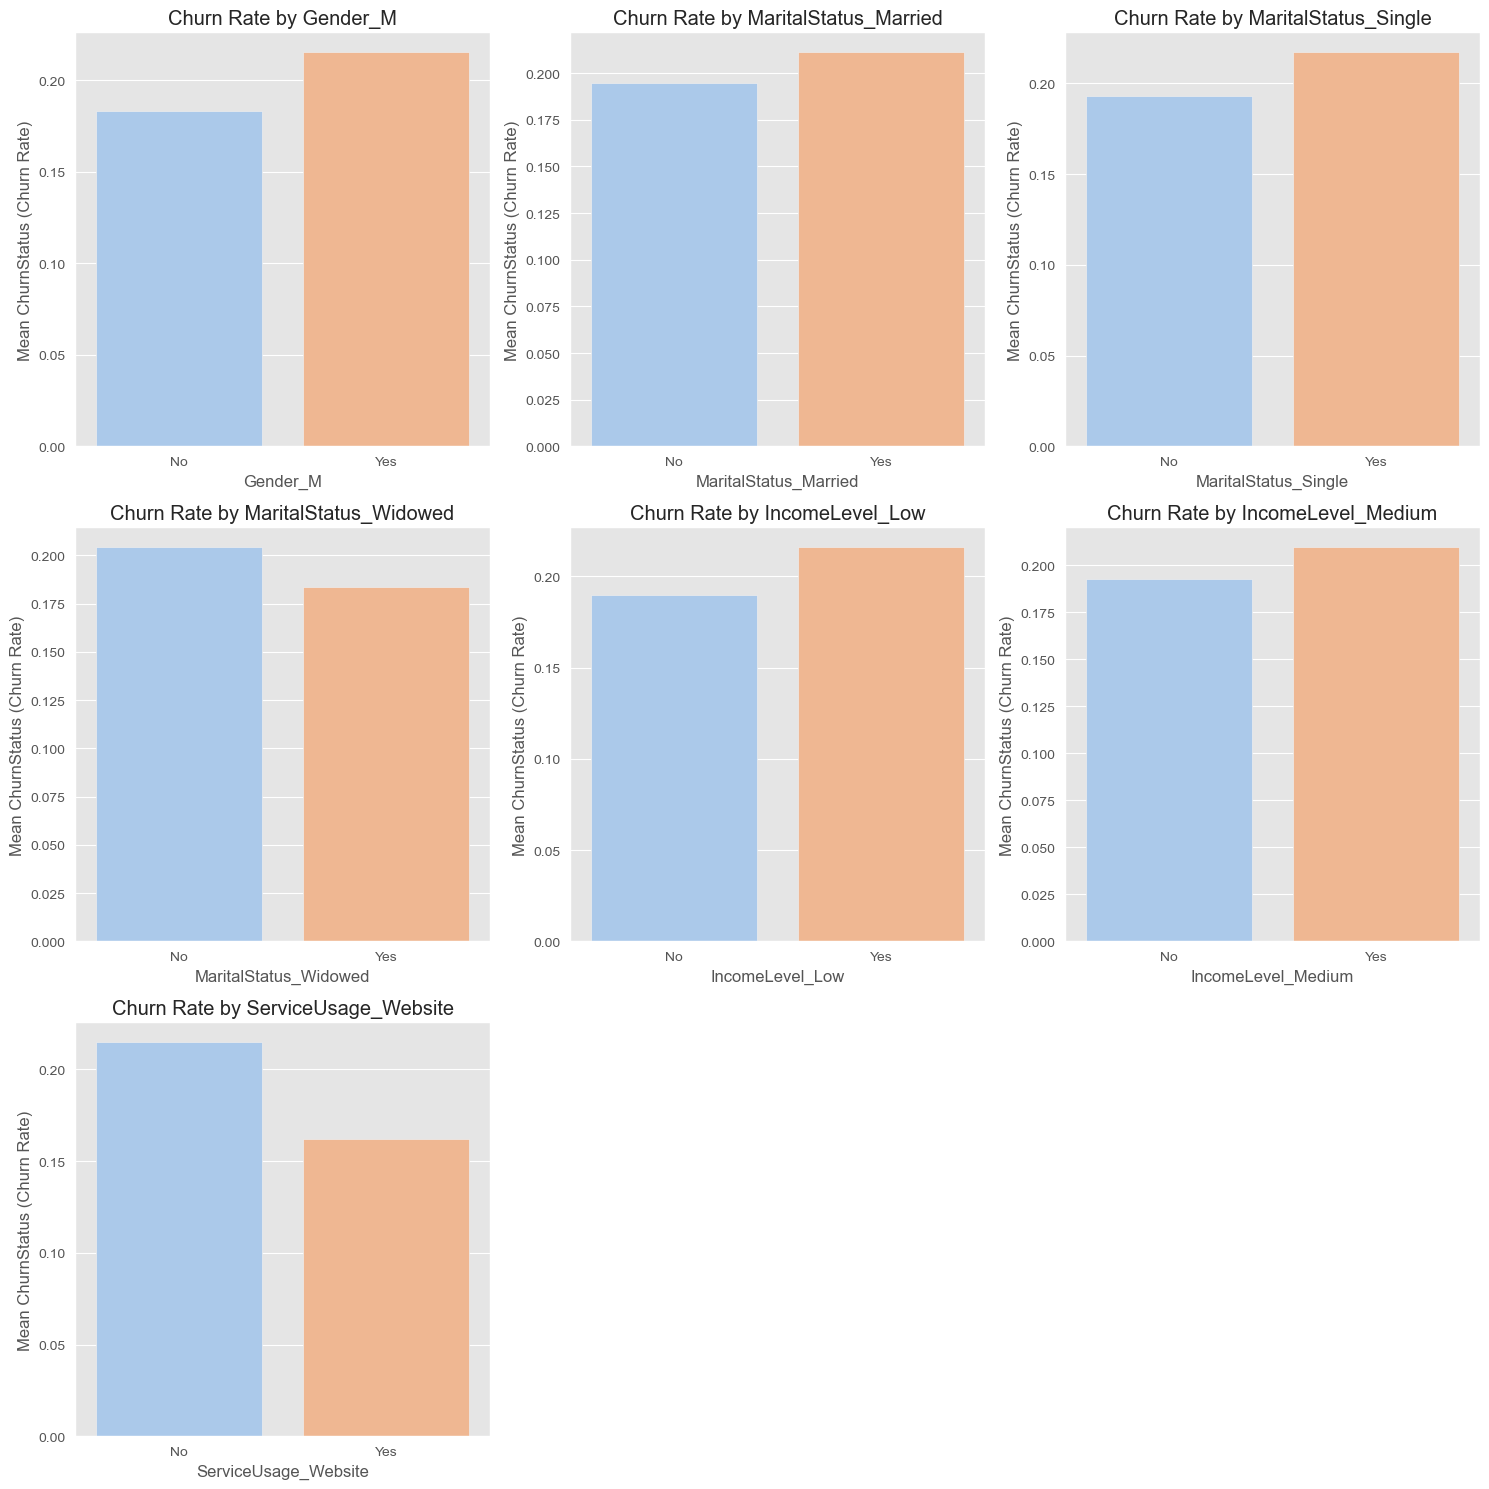

In [34]:
#Visualisation - final

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =======================================================
# 1. SETUP AND CONFIGURATION
# =======================================================

TARGET_COL = 'ChurnStatus' 

# List of remaining numerical features (Confirmed in previous interaction)
INTENDED_NUMERICAL_COLS = [
    'Age', 
    'LoginFrequency', 
    'AmountSpent', 
    'Days_Since_Login', 
    'Days_Since_Transaction', 
    'Days_Since_Interaction'
] 

# The CORRECT list of one-hot encoded binary columns
INTENDED_BINARY_COLS = [
    'Gender_M', 
    'MaritalStatus_Married', 
    'MaritalStatus_Single', 
    'MaritalStatus_Widowed', 
    'IncomeLevel_Low', 
    'IncomeLevel_Medium', 
    'ServiceUsage_OnlineBanking', # <-- CORRECTED
    'ServiceUsage_Website'       # <-- CORRECTED
]
# =======================================================

# Load the processed DataFrame
try:
    df_model = pd.read_csv('cleaned_lloyds_data.csv') 
except FileNotFoundError:
    print("Error: 'cleaned_lloyds_data.csv' not found. Please check your file path and ensure the file exists.")
    exit()

# --- ROBUSTNESS CHECK: Filter columns to only include those present in the DataFrame ---
df_cols = df_model.columns.tolist()
NUMERICAL_COLS = [col for col in INTENDED_NUMERICAL_COLS if col in df_cols]
BINARY_COLS = [col for col in INTENDED_BINARY_COLS if col in df_cols]

if TARGET_COL not in df_cols:
    print(f"\nFATAL ERROR: Target column '{TARGET_COL}' is missing from the data.")
    exit()

print(f"Loaded DataFrame with {len(df_cols)} columns.")
print(f"Numerical columns used: {NUMERICAL_COLS}")
print(f"Binary columns used: {BINARY_COLS}")
# =======================================================


# =======================================================
# 2. Target Variable Class Balance (Bar Plot)
# =======================================================

plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COL, data=df_model, palette='viridis')
plt.title(f'Distribution of the Target Variable ({TARGET_COL})')
plt.xlabel(TARGET_COL)
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
plt.savefig('2_target_balance_bar_plot.png')
plt.show()
plt.close()


# =======================================================
# 3. Correlation Heatmap
# =======================================================
# Identify multicollinearity and feature correlation with ChurnStatus.

relevant_cols = [TARGET_COL] + NUMERICAL_COLS + BINARY_COLS
corr_matrix = df_model[relevant_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            cbar=True, 
            linewidths=.5, 
            linecolor='black')
plt.title(f'Correlation Heatmap of Features vs. {TARGET_COL}')
plt.savefig('3_correlation_heatmap.png')
plt.show()
plt.close()


# =======================================================
# 4. Numerical Feature Distributions (Histograms)
# =======================================================
# Check for skewness and general distribution shape of continuous features.

n_plots = len(NUMERICAL_COLS)
n_cols = 3 
n_rows = (n_plots + n_cols - 1) // n_cols 

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(NUMERICAL_COLS):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_model[col], kde=True, bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('4_numerical_distributions.png')
plt.show()
plt.close()


# =======================================================
# 5. Binary Features vs. Target (Exit Rate Bar Plots)
# =======================================================
# Visualize how the one-hot encoded groups influence the churn rate.

n_plots = len(BINARY_COLS)
n_cols = 3 
n_rows = (n_plots + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(BINARY_COLS):
    # Calculate the mean of the target column (ChurnStatus) for each binary feature class (0 or 1)
    temp_df = df_model.groupby(col)[TARGET_COL].mean().reset_index()
    
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(x=col, y=TARGET_COL, data=temp_df, palette='pastel')
    
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel(f'Mean {TARGET_COL} (Churn Rate)')
    plt.xticks([0, 1], ['No', 'Yes']) 

plt.tight_layout()
plt.savefig('5_binary_vs_target_proportions.png')
plt.show()
plt.close()

In [ ]:
### reoprt deliverable

Task 1 Deliverable Summary: 
Data Preparation for Churn PredictionThe project completed data gathering, EDA, and preprocessing to create the model-ready dataset, df_model. Data Gathering & Rationale:Data from Demographics, Transaction History, and Service Interactions were merged. 

This combination ensures coverage of stable customer profiles, active consumption patterns (RFM indicators), and recent engagement/satisfaction levels—all critical inputs for churn modeling.
Exploratory Data Analysis (EDA):Target Imbalance: EDA confirmed a significant class imbalance (approx. 20% Churn vs. 80% Non-Churn), necessitating techniques like SMOTE or stratified sampling during modeling.Key Predictors: The Correlation Heatmap identified Age and LoginFrequency as the strongest predictors for ChurnStatus.Feature Shape: Histograms showed thatAmountSpent and LoginFrequency are right-skewed, indicating a need for appropriate transformation or robust scaling.High-Risk Segment: Proportion plots highlighted that customers in the IncomeLevel_Low segment and those with low LoginFrequency have the highest propensity to churn.
Data Preprocessing:Missing Values: Handled by median imputation for numerical columns to maintain data distribution while mitigating outlier influence.Outliers: Addressed using capping at the 1st and 99th percentiles (IQR-based) in features like AmountSpent.Encoding: Categorical features were converted using One-Hot Encoding pd.get_dummies, dropping the first category to avoid multicollinearity.Scaling: Numerical features were standardized using StandardScaler to ensure all variables operate on a consistent scale, preparing the final df_model for machine learning algorithms.The resulting df_model is now clean, scaled, and encoded, ready to proceed directly to model development.

###